## notebook_protocole : Introduction

## Explanation step by steps

#### Import the libraries that are recquired for our model

In [80]:
###### FIRST CELL TO EXECUTE : Importing libraries ######

# Basic imports
import pickle
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
# Scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , RobustScaler, MinMaxScaler
#class ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn import preprocessing

#Model évaluation / ensemble models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline

#imblearn library and SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

#report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

#### Import pickle and your dataset

In [35]:
# Importing our trained model
# Here, you need to use the file "pipe_training.pkl" that you will find here :
# https://github.com/Melodyellinn/Projet-Ensemble-Method

with open('pipe_training.pkl', 'rb') as file:
    model_pickle = pickle.load(file)

In [36]:
###### SECOND CELL TO EXECUTE : Importing data that you wan to test ######

# Here, you need to replace the string 'PATHNAME_OF_YOUR_DATA_FILE' by the pathname of your file
# For example : model_df = pd.read_csv('data/eda_clean_df.csv')
# model_df = pd.read_csv('PATHNAME_OF_YOUR_DATA_FILE')

model_df = pd.read_csv('data/data.csv')

In [51]:
###### THIRD CELL TO EXECUTE : Creating clusters and transforming some columns of your dataframe ######

#replace the column's names
model_df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in model_df.columns]

#drop target and categorial's columns
model = model_df.drop(model_df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']],axis =1)

In [52]:
model.shape

(6819, 93)

In [53]:
# Splitting between column with max value <= 1 and max value > 1
# Create 2 lists to store columns name/values
max_1 = []
max_above_1 = []

#Looping through the dataset, populating lists above
for column in model:
    if model[column].max() <= 1:
        max_1.append(model[column])
    else:
        max_above_1.append(model[column])
    

model_2 = pd.DataFrame(max_1).T
model_3 = pd.DataFrame(max_above_1).T

In [54]:
model_2.shape

(6819, 69)

In [55]:
model_3.shape

(6819, 24)

In [56]:
#use StandardScaler() columns in model_2
sc = StandardScaler()
model = sc.fit_transform(model_2.iloc[:,1:])
df_sc = pd.DataFrame(model,columns= model_2.iloc[:,1:].columns)

df_sc[['Bankrupt?','Cash flow rate', 'Net Income Flag']] = model_df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [57]:
df_sc.shape

(6819, 71)

In [58]:
#use MinMaxScaler() columns in model_3
minmax = MinMaxScaler()
model = minmax.fit_transform(model_3.iloc[:,1:])
df_minmax = pd.DataFrame(model_df,columns= model_3.iloc[:,1:].columns)
#take target in df because the targets remove to df_30 (targets <= 1)
df_minmax['Bankrupt?'] = model_df['Bankrupt?']

In [59]:
df_minmax.shape

(6819, 24)

In [60]:
#Tu as deux dataframe
#Appliquer la PCA sur les deux dataframes

# définition de la commande pour df_sc
pca = PCA(n_components=5)
# Sélection des variables quantitatives
dat= df_sc.drop(df_sc[['Bankrupt?','Cash flow rate', 'Net Income Flag']], axis=1)
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)

# Repasser les données en DataFrame
sc_pca = pd.DataFrame(C)
sc_pca[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']] = model_df[['Bankrupt?', 'Cash flow rate', 'Net Income Flag']]

In [61]:
sc_pca.shape

(6819, 8)

In [62]:
#Définition de la commande pour df_minmax
pca = PCA(n_components=5)
# Sélection des variables quantitatives
dat= df_minmax.drop(df_minmax[['Bankrupt?']], axis=1)
# réduction
data = pd.DataFrame(scale(dat),columns=dat.columns)
# composantes principales
C = pca.fit(data).transform(data)

# Repasser les données en DataFrame
minmax_pca = pd.DataFrame(C)
minmax_pca[['Bankrupt?']] = model_df[['Bankrupt?']]

C:\Users\Simplon\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [63]:
minmax_pca.shape

(6819, 6)

In [64]:
# Assembler les deux df et supprimer la target doublé
model_full = sc_pca.merge(minmax_pca, left_index=True, right_index= True, how='left')
model_full = model_full.drop('Bankrupt?_y',axis =1)

In [65]:
model_full.shape

(6819, 13)

In [66]:
#Définir sa target et faire un split pour train_test
y= model_full['Bankrupt?_x']
X= model_full.drop('Bankrupt?_x', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.3,
                                                    random_state=0)

In [85]:
###Test the model

y_pred = model_pickle.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
#Look the prediction
prediction_df = pd.DataFrame()
prediction_df['Real_Value'] = y_test
prediction_df['Prediction_Value'] = y_pred
prediction_df

,Real_Value,Prediction_Value
4929,0,0
6424,0,0
3807,0,0
2011,0,0
6728,1,0
...,...,...
5809,0,0
5961,0,0
4623,0,0
4783,0,0


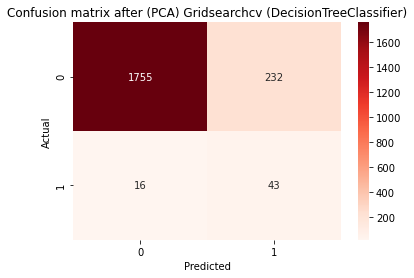

In [90]:
#Confusion matrice
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion matrix after (PCA) Gridsearchcv (DecisionTreeClassifier)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()